In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt

In [8]:
crime = pd.read_csv("New_Offense_Data_2024.csv")
codes = pd.read_csv("New_Offense_Data_2024.csv", encoding="latin1")

In [10]:
crime.head()

,Address,CaseNumber,CouncilDistrict,CrimeAgainst,CustomCrimeAgainst,CustomCrimeCategory,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseCount,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,ReportMonthYear
0,NaN,24-X5909611,Council District 3,Person,Person,Assault: Aggravated,Montavilla,1/1/2024,514,Assault Offenses,1,Aggravated Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024
1,NaN,24-X5909638,Council District 1,Person,Person,Assault: Simple/Intimidation,Powellhurst-Gilbert,1/1/2024,429,Assault Offenses,1,Simple Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024
2,NaN,24-X5909659,Council District 1,Person,Person,Assault: Simple/Intimidation,Hazelwood,1/1/2024,747,Assault Offenses,1,Simple Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024
3,NaN,24-X5909665,Council District 2,Person,Person,Assault: Simple/Intimidation,Cully,1/1/2024,5,Assault Offenses,1,Simple Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024
4,NaN,24-X5909704,Council District 2,Person,Person,Assault: Simple/Intimidation,Overlook,1/1/2024,1959,Assault Offenses,1,Simple Assault,NaN,NaN,NaN,NaN,1/1/2024,January 2024


In [11]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57143 entries, 0 to 57142
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              51962 non-null  object 
 1   CaseNumber           57143 non-null  object 
 2   CouncilDistrict      56364 non-null  object 
 3   CrimeAgainst         57143 non-null  object 
 4   CustomCrimeAgainst   57143 non-null  object 
 5   CustomCrimeCategory  57143 non-null  object 
 6   Neighborhood         56645 non-null  object 
 7   OccurDate            57143 non-null  object 
 8   OccurTime            57143 non-null  int64  
 9   OffenseCategory      57143 non-null  object 
 10  OffenseCount         57143 non-null  int64  
 11  OffenseType          57143 non-null  object 
 12  OpenDataLat          51459 non-null  float64
 13  OpenDataLon          51459 non-null  float64
 14  OpenDataX            51459 non-null  float64
 15  OpenDataY            51459 non-null 

In [12]:
print(crime.shape[0])
print(crime.columns.tolist())
print(crime.dtypes)

57143
['Address', 'CaseNumber', 'CouncilDistrict', 'CrimeAgainst', 'CustomCrimeAgainst', 'CustomCrimeCategory', 'Neighborhood', 'OccurDate', 'OccurTime', 'OffenseCategory', 'OffenseCount', 'OffenseType', 'OpenDataLat', 'OpenDataLon', 'OpenDataX', 'OpenDataY', 'ReportDate', 'ReportMonthYear']
Address                 object
CaseNumber              object
CouncilDistrict         object
CrimeAgainst            object
CustomCrimeAgainst      object
CustomCrimeCategory     object
Neighborhood            object
OccurDate               object
OccurTime                int64
OffenseCategory         object
OffenseCount             int64
OffenseType             object
OpenDataLat            float64
OpenDataLon            float64
OpenDataX              float64
OpenDataY              float64
ReportDate              object
ReportMonthYear         object
dtype: object


In [13]:
crime.isnull().sum()

Address                5181
CaseNumber                0
CouncilDistrict         779
CrimeAgainst              0
CustomCrimeAgainst        0
CustomCrimeCategory       0
Neighborhood            498
OccurDate                 0
OccurTime                 0
OffenseCategory           0
OffenseCount              0
OffenseType               0
OpenDataLat            5684
OpenDataLon            5684
OpenDataX              5684
OpenDataY              5684
ReportDate                0
ReportMonthYear           0
dtype: int64

In [15]:
# طباعة عدد الصفوف المكررة
print(f"عدد الصفوف المكررة قبل الحذف: {crime.duplicated().sum()}")

عدد الصفوف المكررة قبل الحذف: 0


<Axes: >

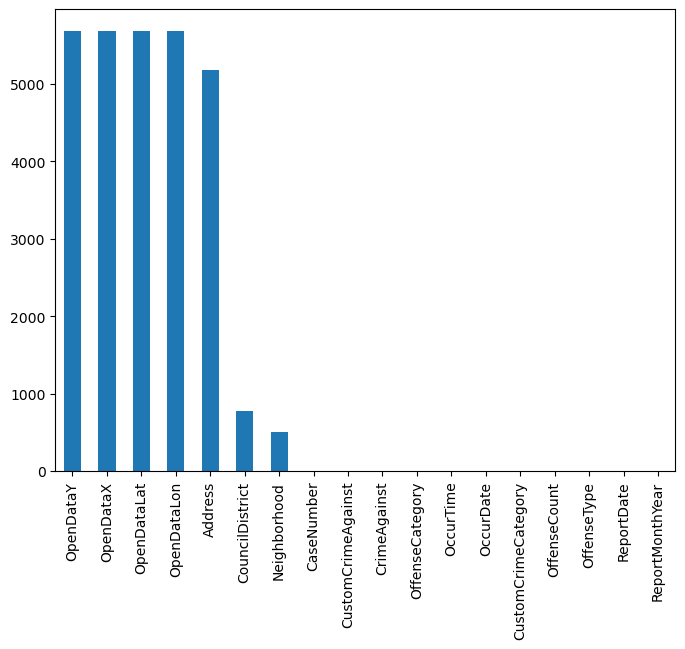

In [18]:
total = crime.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)


In [21]:
# حساب الوسيط لخط العرض والطول
median_lat = crime['OpenDataLat'].median()
median_lon = crime['OpenDataLon'].median()

# ملء القيم المفقودة باستخدام الوسيط (الطريقة الصحيحة لتجنب التحذير)
crime['OpenDataLat'] = crime['OpenDataLat'].fillna(median_lat)
crime['OpenDataLon'] = crime['OpenDataLon'].fillna(median_lon)

print("تم ملء القيم المفقودة في أعمدة OpenDataLat و OpenDataLon بنجاح.")

تم ملء القيم المفقودة في أعمدة OpenDataLat و OpenDataLon بنجاح.


In [22]:
# مثال: ملء القيم المفقودة في عمود الحي (Neighborhood) باستخدام المنوال
mode_neighborhood = crime['Neighborhood'].mode()[0]
#crime['Neighborhood'].fillna(mode_neighborhood, inplace=True)
crime['Neighborhood']=crime['Neighborhood'].fillna(mode_neighborhood)

print("تم ملء القيم المفقودة في عمود Neighborhood.")

تم ملء القيم المفقودة في عمود Neighborhood.


In [23]:
crime.isnull().sum()

Address                5181
CaseNumber                0
CouncilDistrict         779
CrimeAgainst              0
CustomCrimeAgainst        0
CustomCrimeCategory       0
Neighborhood              0
OccurDate                 0
OccurTime                 0
OffenseCategory           0
OffenseCount              0
OffenseType               0
OpenDataLat               0
OpenDataLon               0
OpenDataX              5684
OpenDataY              5684
ReportDate                0
ReportMonthYear           0
dtype: int64